## *Задача 1* 


Напишите функцию, которая вычисляет обратную матрицу методом простых итераций (через ряд Неймана).

# Задача 2


Напишите функцию, которая вычисляет обратную матрицу методом Шульца (метод минимальных невязок).

# Задача 3

Создайте массивы, содержащие координаты облака точек в трёхмерном пространстве. Координаты сгенерируйте случайным образом. Массивы должны содержать координаты точек: первая точка имеет координаты (хр [0], ур [0], zp [0]), вторая точка - координаты $(\mathrm{xp}[1], \mathrm{yp}[1], \mathrm{zp}[1])$ и т.д. Нарисуйте точки на трехмерном графике. Можно заметить, что точки группируются вблизи некоторой плоскости. Задача состоит в том, чтобы построить данную плоскость. В качестие критерия выберем следующий: назовем наилучшей такую плоскость, что сумма квадратов ортогональных расстояний от точек до этой плоскости минимальна. Изобразите найденную плоскость на графике с облаком точек. Прокомментируйте полученные результаты.

Указание 1. 

Пусть плоскость с вектором нормали $\vec{n}$ проходит через точку с координатами  $\vec{c}$.  Тогда расстояние от точки $\vec{p}$ до плоскости дается скалярным произведением $\langle(\vec{p}-\vec{c}) \cdot \vec{n}\rangle$. Таким образом, задача поиска наилучшей плоскости сводится к задаче наименьших квадратов относительно единичного вектора нормали $\vec{n}$. 

Указание 2. 

Задачу МНК можно решать с помощью псевдообратной матрицы. В нашем случае система переопределённая, можно использовать следующий метод: 

$Ax= b$ 



$x=\left(A^{T} A\right)^{-1} A^{T}
b$ 



#Задача 4

Перепишите следующий код на Python так, чтобы он генерировал матрицу $A$ (состоящую из 0 и 1), которая рисует слово "МФТИ" :

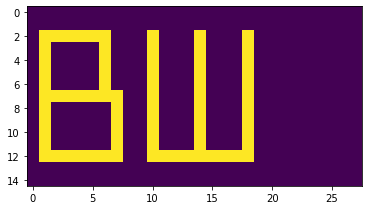

In [4]:
import numpy as np
import matplotlib.pyplot as plt

a = np.zeros((15, 28))
a[2:-2, 1] = 1;  a[2, 2:6] = 1
a[2:7, 6] = 1;   a[7:-2, 7] = 1
a[7, 2:7] = 1;   a[-3, 2:7] = 1
a[2:-2, 10] = 1; a[2:-2, 14] = 1
a[2:-2, 18] = 1; a[-3, 10:19] = 1
plt.imshow(a)

Постройте SVD разложение матрицы $A$. Чему равен $\operatorname{rank}(\mathrm{A})$ ?

Для каждого $i=1,2, \ldots, \operatorname{rank}(A)$, постройте матрицу $B_{i}$ ранга $i$, которая наилучшим образом (в 2-норме) приближает матрицу $A$ (постройте соответствующее изображение). Вычислите к каждой из этих матриц обратную матрицу и визуализируйте их все.



#Задача 5



**Исследование зашумлённого изображения и его фильтра.**

 Возьмите файл data_noisy_image.npz, coдержащий матрицы $A$ и $C$ (изображение и фильтр) и откройте его, используя numру:


In [ ]:
with np.load('data.npz') as data:
  A, C = data ['A'], data ['C']

Для работы с изображением нам будет удобно выстраивать элементы матрицы  $A$   в вектор-столбец  $a$  :

In [ ]:
def mat2vec(A):
  h, w = A.shape
  a = np.zeros(h*w, dtype = A.dtype)
  A = np.flipud(A)
  for i, row in enumerate(A):
    a[i*w : i*w + w] = row
  return a

Так что обратное преобразование - от вектора $a$ в матрицу $A$  осуществляется с помощью функции 

In [ ]:
def vec2mat(a, shape):
  h, w = shape
  A = np.zeros(shape, dtype = a.dtype)
  for in range(h):
    A[i, :] = a[i*w : i*w + w]
  return np.flipud(A)
  

Изображение, содержащееся в матрице $A$, получено из некоторого оригинала $A_{0}$ путем свёртки его с фильтром $C$ и добавлением шума. Фильтр $C$ осуществляет 'размытие' изображения, одновременно меняя его размер от $16 \times 51$ к $25 \times 60$. Используя соответствующие вектора $a$ и $a_{0}$, эту операцию можно записать так

$$
a_{0} \rightarrow a=C a_{0}+\epsilon
$$


где $\epsilon$ - вектор, состоящий из нескоррелированных случайных величин из нормального распределения. 

Постройте изображение, содержащееся в $A$. Используйте функцию matplotlib.pyplot.imshow .

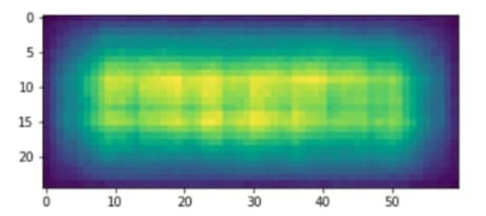

Исследуйте действие фильтра $C$ на изображения: составьте (на свой выбор) матрицу, и проверьте, что с соответствующим изображением делает фильтр $C .$ Вам понадобятся операции a = mat2vec(A) и Ао = vec2mat(a0, shape) для перехода от матричного к векторному представлению и обратно. 

# Задача 6*



**Восстановление зашумлённого изображения.**



Наивный способ восстановить изображение $A_{0}$ по изображению $A$ состоит в том, чтобы решить систему $a=C a_{0}$ относительно вектора $a_{0}$. Какой является эта система: недо- или переопределённой? Используйте SVD матрицы $C$ чтобы найти $a_{0}$ и постройте соответствующее изображение $A_{0}$.